In [149]:
# IMPORT MODULES 
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np 
import datetime

# Define the folder path where the ITS_LIVE csv outputs are saved.
folder_path = "R:/KOGE_BUGT/github/data/ITS_LIVE_velocity/"

# For each CSV file, remove data where the seperation time is greater than 12 days and convert the mid_date to %Y-%m-%d' format.
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        df_filtered = df[df[' dt (days)'] <= 12] # Remove any rows where the seperatime time is greater than 12 days. 
        df_filtered['mid_date'] = pd.to_datetime(df_filtered['mid_date']).dt.strftime('%Y-%m-%d') # Convert the mid_date to %Y-%m-%d' format.
        df_filtered.to_csv(file_path, index=False)
        print(f"Processed file: {filename}")

Processed file: lat_65.17116504_lon_-41.15385223.csv
Processed file: lat_65.19132369_lon_-41.19459264.csv
Processed file: lat_65.21020111_lon_-41.23875782.csv
Processed file: lat_65.22990213_lon_-41.28086612.csv
Processed file: lat_65.2491836_lon_-41.32410635.csv


In [150]:
# Define the file paths for each of the ITS_LIVE CSV files
file_paths = {'T': 'R:/KOGE_BUGT/github/data/ITS_LIVE_velocity/lat_65.17116504_lon_-41.15385223.csv',
    'T3': 'R:/KOGE_BUGT/github/data/ITS_LIVE_velocity/lat_65.19132369_lon_-41.19459264.csv',
    'T6': 'R:/KOGE_BUGT/github/data/ITS_LIVE_velocity/lat_65.21020111_lon_-41.23875782.csv',
    'T9': 'R:/KOGE_BUGT/github/data/ITS_LIVE_velocity/lat_65.22990213_lon_-41.28086612.csv',
    'T12': 'R:/KOGE_BUGT/github/data/ITS_LIVE_velocity/lat_65.2491836_lon_-41.32410635.csv'}

# Define the color to be used to represent each of the sampling locations. 
colors = {'T': '#f77f00', 'T3': '#a30b37', 'T6': '#219ebc', 'T9': '#10678e', 'T12': '#023047'}

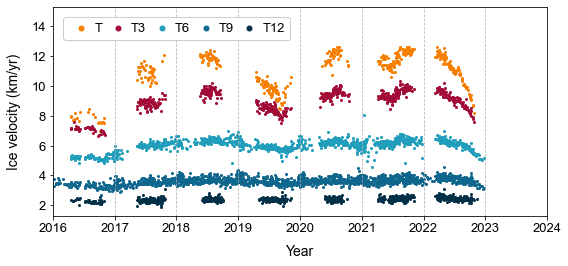

In [151]:
plt.rcParams["font.family"] = "Arial"
plt.figure(figsize=(8, 3.8))
for location, path in file_paths.items():
    df = pd.read_csv(path)
    df['mid_date'] = pd.to_datetime(df['mid_date']).dt.date  
    plt.scatter(df['mid_date'], df[' v [m/yr]']/1000, marker='o', linestyle='-', label=f'{location}', s=4, color=colors[location])

plt.ylabel('Ice velocity (km/yr)', labelpad=10, fontsize=14)
plt.xlabel('Year', labelpad=10, fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.9)
plt.xlim(pd.to_datetime('2016-01-01'), pd.to_datetime('2024-01-01'))
plt.tick_params(axis='y', labelsize=13)
plt.tick_params(axis='x', labelsize=13)
plt.ylim(1.3, 15.3)
plt.legend(loc='upper left', ncol=5, frameon=True, framealpha=1, fontsize=13, markerscale=2.5, columnspacing=0.2, handletextpad=0.01, fancybox=True, borderaxespad = 0.8)
plt.tight_layout() 
plt.show()